# DAE 10 Non parametric tests

author:
- |
    Sofia Dahl, sof@create.aau.dk\
    Dept. Architecture, Design and Media Technology, Aalborg University Copenhagen
---

## Learning goals

After working your way through this notebook you should be able to..
- Explain when and why we use non-parametric tests
- Set up a contingency table and perform Chi square test for categorical data
- Perform the common non parametric tests:
    - Mann-Whitney test
    - Wilcoxon rank-sum test
    - Wilcoxon signed-rank test
    - Kruskal–Wallis test
    - Friedman’s ANOVA


## Table of Contents

- [1. Nominal data](#Nominal)
    - [1.2. Degrees of freedom for contingency tables](#Contingency)
    - [1.3. Chi-square test](#Chisquare)
    - [1.4. Degrees of freedom for contingency tables](#dof)
- [2. Interval data: Comparing two groups of scores](#Interval)
    - [2.1 Independent samples: Mann-Whitney test](#MannWhitney)
    - [2.2 Related samples: Wilcoxon signed-rank test](#Wilcoxon)
- [3. More than two conditions](#Moresamples)
    - [3.1 Independent groups: Kruskal-Wallis Test](#Kruskal)
    - [3.2 Repeated measures: Friedman’s Test](#Friedmans)

<a id= 'Descriptive'> </a>

In [106]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

<a id= 'Nominal'> </a>

## 1. Nominal data

To return to measurement scales once more, you might have a selection test where people are asked to make a choice between two or more alternatives. For instance, you may be interested in testing which, out of two sound designs, participants prefer. In psychology, the "N-alternative-forced-choice" paradigm is often used, where "N" typically stands for 2,3, or some other number of choices that the participants have to select among. For instance in a listening test where the research question can be if the original version of a sound can be identified (or is preferred) in comparison with a set of modified sounds. 

This is nominal data with categories, and as such cannot be analyzed using parametric methods. But that does not mean there are not alternatives. As a start, we will look at how to summarize the results.

<a id= 'Contingency'> </a>

### 1.2 Contingency Table
Assume an experiment where listeners were asked to select the original, uncompressed sound in a 2-alternative forced choice (2AFC). 
For nominal data, we typically get it in a form similar to:

|Soundfile |Correct|
|-----|--------|
|1  |Yes       |
|2  |No     |
|3  |No     |
|4  |No     |
|5  |No     |
|6  |Yes    |
|7  |Yes   |
|8  |No     |
|:  |:     |


and so on. 

For analysis, we instead want a *contingency table* where we summarize the observed frequencies. 
In the above example, we can imageine that for a total of 144 sound clips, 80 of them are correctly identified as uncompressed. 

|Correct |Incorrect|Total|
|-----|--------|-----|
|80   |64      |144  |


In other casese, we have more variables which result in several rows, so that we get a R x C table. For instance, we might have two groups of instrumentalists that are to evaluate and select their preferred among three different interfaces for a digital musical instrument. 

In [107]:
#The data for the different participants and their preference could look something like this: 
df = pd.DataFrame({'Participant': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                            11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                   'Instrument': ['Drum', 'Violin', 'Violin', 'Drum', 'Drum', 'Violin',
                               'Violin', 'Violin', 'Violin', 'Violin', 'Drum', 'Drum', 'Drum',
                               'Drum', 'Drum', 'Drum', 'Drum', 'Drum', 'Violin', 'Drum'],
                   'Interface': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
                               'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']})
#print out the first four participants
df.head(4)

,Participant,Instrument,Interface
0,1,Drum,A
1,2,Violin,A
2,3,Violin,A
3,4,Drum,A


This can now be summarized in a contingency table with Instrument in the rows, and choice of Interface in columns.

In [68]:
#create contingency table with Instrument as rows, and choice of Interface in columns

Interfacetable=pd.crosstab(df.Instrument, [df.Interface], margins=False)
#Margins=True adds the row and column sums

Interfacetable

Interface,A,B,C
Instrument,,,
Drum,2,3,7
Violin,2,5,1


The table should be interpreted as
- Among the 12 drummers (first row): 2 chose interface A, 3 interface B, and 7 chose interface C 
- Among the Violinists (second row): 2 chose interface A, 5 interface B, and 1 chose interface C

Alternatively, if we choose to focus on the columns:
- Interface A was selected by a total of 4 participants, while interface B and C were both preferred by 8. 

From the table, it seems like drummers and violinists had different preferences in their choice of interface to control the musical instrument. But are these differences purely random, or are interfaces B and C actually preferred over A?

The reason that we go through these ways to summarize nominal data is, of course, because we also can use these tables for something. Specifically, we can apply a chi-square test to answer our question.

<a id= 'Chisquare'> </a>

### 1.3 Chi-square test
In the case of nominal data we cannot use parametric tests, but we can still test whether one test is selected more than the others. We can do this by comparing the number of times the sound is selected to the alternative with what would have been expected *if it had been at random*. That is, if participants had just randomly picked one of the alternatives without even bothering to listen.

The chi-square test can be used for non numerical and non-normally distributed data where there are categories or different options. The chi-square statistic is calculated as the squared difference between *observed* frequency  $f_o$ and *expected* frequency $f_e$ , divided by the latter:
$$\chi^2= \sum{{(f_o - f_e)^2}\over{f_e}}$$

In the listening test earlier, we had a contingency table with 144 sound clips, either correctly or incorrectly identified as uncompressed. 

|Correct |Incorrect|Total|
|-----|--------|-----|
|80   |64      |144  |


The expected frequency $f_e$, if people were randomly selecting one of the two sounds, would have been equally distributed

|Correct |Incorrect|Total|
|-----|--------|-----|
|72   |72      |144  |

### Try out 1:
Calculate $\chi^2$ for the example listening test above


In [ ]:
#The task is almost as easily done by hand, but here are some starting hints for using python

#fo_correct=
#fo_incorrect=
#fe_correct=
#fe_incorrect=

#Square the difference between observed and expected
# (fo_correct-fe_correct)^2
#(fo_incorrect-fe_incorrect)^2

#

Much like the parametric tests, one determines whether the calculated statistic falls in the *critical region*. That is, if the difference between the expected and observed value is so large that it is unlikely to occur by chance. Just as for parametric tests, the cut-off point for the critical region depends on the significance level (alpha, $\alpha$) and the *degrees of freedom* (df). 

<a id= 'dof'> </a>

### 1.3 Degrees of freedom for contingency tables

The degrees of freedom for a chi-square test has to do with the number of choices, or options in the contingency table: 
$$df=(R-1)(C-1)$$

Note that this is different from  many other statistics, for instance sample variance, where df is related to the sample size.

For the special case of only one row, the first factor is not part. In a test involving participants' selection of singers as being either male or female, there are two possible options to chose from. Just like the listening test example above, and is results in two categories (C) and  the degrees of freedom is $C-1=2-1=1$



### Try out 2: 
Calculate the degrees of freedom for the instrument and interface contingency table (in section 1.2).

In [77]:
#Get the rows and columns from the table
#Interfacetable.shape

So with the $\chi^2$ and the degrees of freedom, we can look up the probability for achieving this statistic and the relation to the critical value. There are plenty of actual tables to do this, but, like most other statistical packages, python has functions that does the looking-up-job for us.


In [70]:
#the scipy.stats function chi2_contingency give us the chisquare test from the observed contingency table
#based on the marginal sums (calculated totals) it calculates the expected frequencies 
#and returns the chi-square statistic, probability, as well as degrees of freedom
stat, p, dof, expected = stats.chi2_contingency(Interfacetable)

print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=4.375, p=0.112


### Try out 3: 
Print the degrees of freedom output from the chi2_contingency function and compare to that you calculated in Try out 2.

In [78]:
#print('Degrees of freedom=%i '  % (dof))

<a id= 'Interval'> </a>

## 2. Interval data: Comparing two groups of scores

In many other cases we have interval or ratio data, but other assumptions for parametric tests are violated. Perhaps the plan was to run a t-test, but the scores are skewed or variances too different between groups. 

Rather than relying on the mean and variance as we would for parametric data, the approach is then to *rank* it. Instead of using the actual scores in the data, so that the lowest score receive the rank of 1, the next highest score 2, etc. The test statistic is then calculated on these ranks. This also mean that we do not have to make any assumptions about the data (with respect to the shape of their distribution for example). Unfortunately we also loose information and so these tests are not as powerful in detecting effects as parametric tests. 


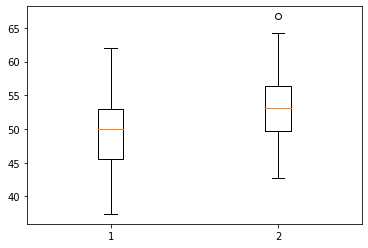

In [108]:
# generate two sets of univariate observations with 100 observations
N=100
data1 = 5 * np.random.randn(N) + 50
data2 = 5 * np.random.randn(N) + 53
# summarize
plt.boxplot([data1,data2])
plt.show()


<a id= 'MannWhitney'> </a>

### 2.1 Independent samples: Mann-Whitney rank-sum Test
The Mann-Whitney rank-sum test compares two independent groups of scores and is the non-parametric equivalent to the independent t-test. 

The test compares the ranked positions of scores in the two groups. The function returns the probability that these two samples are from the same distribution (but, again, based on ranks and without assumptions on the shape).

In [118]:
from scipy.stats import mannwhitneyu

#Mann-Whitney rank-sum test on data1 and data2, returing statistic and probability
Ustat, p = stats.mannwhitneyu(data1, data2)

#print results
print('U=%.3f, p=%.3f' % (Ustat, p))

U=4850.000, p=0.357


The effect-size from the Mann-Whitney test can be calculated from the number of observations (N) and the z-score.


$$r =\frac {Z} {\sqrt{N}}$$

..but we do not get the z-score in the output from the stats-function for this test. 

In [86]:
#help(stats.mannwhitneyu)

### Try out 4: 
Go back up to the generation of data and change N to 30. Redo the Mann-Whitney rank-sum test and compare. 

<a id= 'Wilcoxon'> </a>

### 2.2 Related samples: Wilcoxon signed-rank test
If we instead want to compares two dependent groups of scores we use the Wilcoxon signed rank test.

Again, data is ranked and the test examines the difference between the ranks in the two groups. This can be either negative (the 2nd condition rank is smaller than that in the first), positive (the 2nd condition rank is larger than that in the first), or tied (no difference between the ranks in the two conditions).

We return to the stroop-test data we discovered to be skewed in the parametric data chapter. 
The test has related samples because each participant had both congruent and incongruent stimuli to respond to.

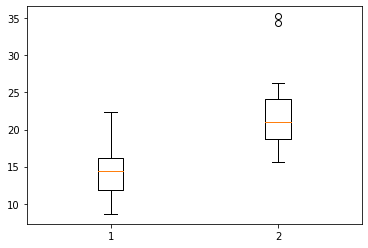

In [110]:
#load stroop test data
data = pd.read_csv('Stroopdata.txt', delimiter = '\t', index_col=0,header=0) 
data.describe()
plt.boxplot([data.Congruent,data.Incongruent])
plt.show()

In [111]:
#perform Wilcoxon test (from scipy.stats) on the difference between conditions
Tstat_stroop, p_stroop =stats.wilcoxon(data.Congruent,data.Incongruent)
#print results
print('T=%.3f, p=%.3f' % (Tstat_stroop, p))

T=0.000, p=0.000


The resulting p-value shows that it is highly unlikely that the two set of scores would come from the same distribution. So the test confirms what might be guessed from the plot: it takes considerably longer to say read the colour in the incongruent condition. Of course the probability is not perfectly zero, but rounded off. 

Like for the Mann-Whitney  test, the effect size r could be calculated from the z-score, if you run this test using a program/function that reports it.

<a id= 'Moresamples'> </a>

## 3 More than two conditions

As in the parametric case, we should avoid multiple comparisons when we have more than two samples or conditions. So just as we use ANOVA to examine main effects for groups when we have more than two conditions we use the non-parametric equivalents when the parametric assumptions are not fulfilled.

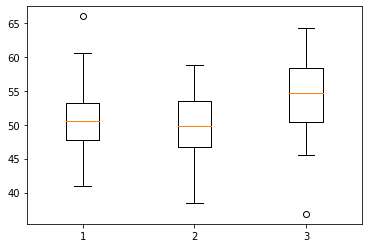

In [131]:
data1 = np.random.randn(100)*5 + 50
data2 = np.random.randn(100)*5 + 50
data3 = np.random.randn(100)*5 + 54

plt.boxplot([data1,data2, data3])
plt.show()

<a id= 'Kruskal'> </a>

### 3.1  Independent groups: Kruskal-Wallis Test

In the case when we have more than two independent samples the Kruskal-Wallis is the non-parametric alternative to one-way independent  ANOVA and tests differences between independent groups of scores.

Similar to the two-group examples above, the test is performed on the ranked data. The mean rank data can be used for interpreting effects (if you can get it).


In [114]:
# kruskal from scipy.stats 

Hstat,p=stats.kruskal(data1,data2,data3)
print('H=%.3f, p=%.3f' % (Hstat, p))

H=27.908, p=0.000


Just as for the ANOVA, the main effect does not say which of the groups/conditions that is the cause of the effect. For this one need follow-up test. Field & Hole suggest to do this using  Mann-Whitney tests but with Bonferroni correction of the significance level and to be selective about which pairwise comparisons that are needed. 

Like always, it is a good idea to check the details of the function before. Specifically, you will notice a warning about using the test for very small sample sizes (must have at least 5 observations).

In [117]:
#help(kruskal)

<a id= 'Friedmans'> </a>

### 3.2 Repeated measures: Friedman’s Test
When we have used the same participants in all conditions the observations are related. Friedman's test compares more than two paired samples and is the non-parametric correspondence to repeated measures ANOVA. 


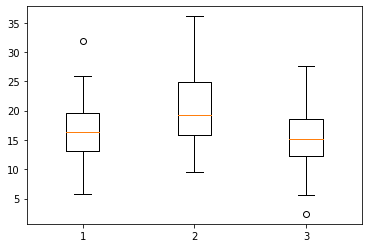

In [130]:

# generate three independent samples
Condition1 = 5 * np.random.randn(100) + 16
Condition2 = 5 * np.random.randn(100) + 20
Condition3 = 5 * np.random.randn(100) + 15

plt.boxplot([Condition1,Condition2, Condition3])
plt.show()


The test statistics is an acquaintance from earlier up this notebook,  $\chi^2$ 

In [129]:
Chistat, p = stats.friedmanchisquare(Condition1, Condition2, Condition3)
print('Chi-square=%.3f, p=%.3f' % (stat, p))


Chi-square=1399.000, p=0.000
